# More Pandas and Seaborn

## Outline
 - [Pandas](#pandas)
     - [Indexing](#index)
     - [Loading Data](#load)
 - [Seaborn](#seaborn)
     - [Iris Data](#iris)

***

We will now expand our use of conditional statements by allowing for multiple conditions.

<b> Reminders: </b> 
  
  1) Use print statements check what your code is doing (or not doing) as you write it
  
  2) Comment your code!
***

In [1]:
# load packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Pandas <a id='pandas'> </a>

<b> Practice! </b> Take 5 minutes to complete numbers <b> 3-5 </b>

1) Come up with two questions with quantitative responses.

2) Ask the people in your 'pod' (ask at least 4 people) and record their responses.

3) Create data frame with the responses. 

4) Add your responses to the data frame.

5) Create one plot and save both the dataframe (as a csv file) and the plot (as a png). 

In [2]:
gas = pd.Series({'CA': 3.700, 'LA': 2.598, 'MD': 2.840, 'TX': 2.701 }) # gas prices/gallon in dollars
pop = pd.Series({'CA': 37.253, 'LA': 4.533, 'MD': 5.773, 'TX': 25.145 }) #population (in millions)
states = pd.DataFrame({'gas':gas, 'pop':pop})

In [3]:
states

,gas,pop
CA,3.700,37.253
LA,2.598,4.533
MD,2.840,5.773
TX,2.701,25.145


### Indexing DataFrames <a id='index'> </a>

Indexing values of DataFrames follows a different convention than numpy arrays. They follow the following framework
```python
data.iloc[x,y] # positional entry
data.loc['key1','key2'] # entry using the keys
```

In [5]:
# Let's see how that works your DataFrame
#print(states.iloc[0,1])
print(states.loc['CA','pop'])

37.253


### Loading and Manipulating Data <a id='load'> </a>

Now that we have a better idea on how to save data to a .csv file, let's move on to loading and handling that loaded data.

In [6]:
# saving data to csv
states.to_csv('states_data.csv')

In [22]:
# reading in data from csv files
# newstates = pd.read_csv('states_data.csv')
# what happened to the index??
newstates = pd.read_csv('states_data.csv', index_col='Unnamed: 0')
newstates

,gas,pop
CA,3.700,37.253
LA,2.598,4.533
MD,2.840,5.773
TX,2.701,25.145


In [12]:
# Now that you have loaded this data, calculate the mean and median
#print(newstates)

np.mean(newstates)
#np.median(newstates)
#help(np.median)
#np.median(newstates,axis=0)
#np.median(newstates)
#help(np.median)

gas     2.95975
pop    18.17600
dtype: float64

<b> Practice! </b> Do universal functions (Ufuncs) work on DataFrames?

In [16]:
newstates + 1

,gas,pop
CA,4.700,38.253
LA,3.598,5.533
MD,3.840,6.773
TX,3.701,26.145


In [27]:
# There are some commands you can use in pandas to change the values
#newstates.loc[newstates.gas > 4.0, 'pop'] = 0
newstates.loc[newstates.gas > 4.0, 'pop'] = 0
newstates

,gas,pop
CA,3.700,37.253
LA,2.598,4.533
MD,2.840,5.773
TX,2.701,25.145


## Plotting with Seaborn <a id='seaborn'> </a>

Seaborn is another Python package we can use for plotting

In [28]:
import seaborn as sns; sns.set()

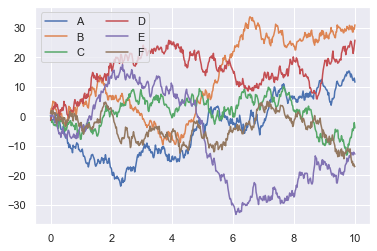

In [29]:
# same plotting code as before!
p = np.linspace(0, 10, 500)
q = np.cumsum(np.random.randn(500,6), 0) 

plt.plot(p, q)
plt.legend('ABCDEF', ncol=2, loc='upper left');

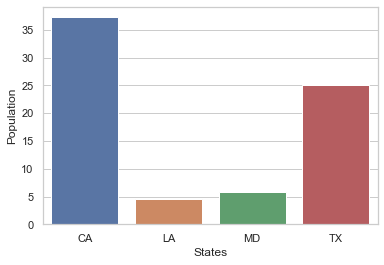

In [30]:
sns.set_style("whitegrid")
# here, I need to specify the data set
myfig = sns.barplot(x=states.index, y='pop', data=states)
# Let's rewrite the labels assigned
myfig.set(xlabel='States', ylabel='Population');

<b> Practice! </b> Create and save 2 different plots for the question you asked. If you want to look at all the different options, you can navigate to the <a href="https://seaborn.pydata.org/index.html"> Seaborn Documentation Page.</a>

### Iris Data <a id='iris'> </a>

In [31]:
# Python also has some prebuilt datasets
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
np.percentile( iris['petal_width'], [25, 50, 75])

array([0.3, 1.3, 1.8])

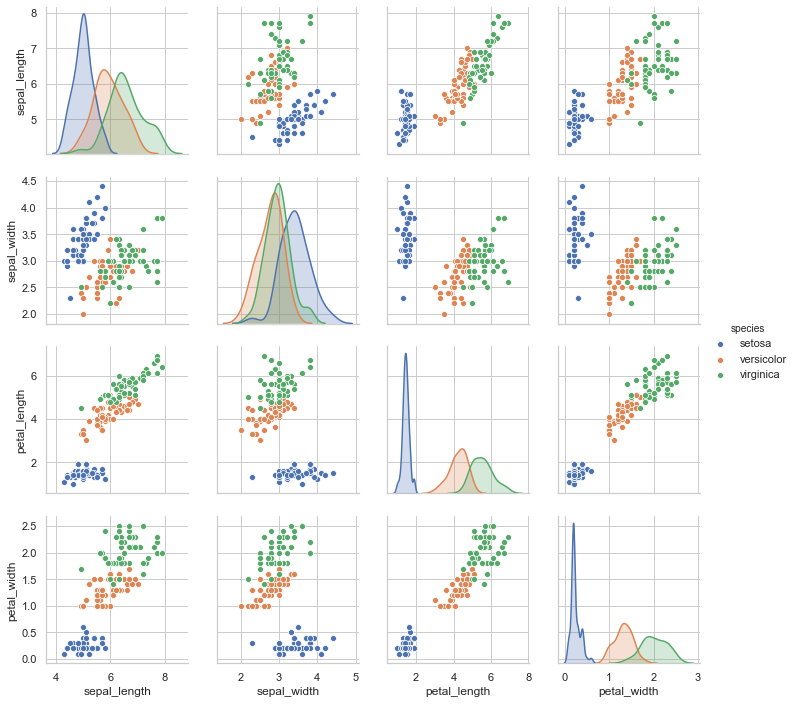

In [33]:
# create a pair plot of all the predictors with the species as the color
sns.pairplot(iris, height=2.5, hue='species');

<b> Practice! </b> 

1) What trends do you notice in these plots?

2) Create a new column that is 0 if the petal length is less than 3 and 1 if the petal length is more than 3.

3) Create a pairplot but with the hue of the new column instead of species.